## 1 Preliminaries                          

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/gawron/python-for-social-science/blob/master/pandas/pandas_assignment.ipynb)

In [65]:
# The usual preamble
import numpy as np

import pandas as pd
from matplotlib import pyplot as plt
# Make the graphs a bit prettier, and bigger
#pd.set_option('display.mpl_style', 'default') 
#pd.set_option('display.line_width', 5000) 
pd.set_option('display.max_columns', 60) 

#figsize(15, 5)

We're going to use a new dataset here, to demonstrate how to deal with larger datasets. This is a subset of the of 311 service requests from [NYC Open Data](https://nycopendata.socrata.com/Social-Services/311-Service-Requests-from-2010-to-Present/erm2-nwe9). 

In [66]:
import pandas as pd
url = 'https://gawron.sdsu.edu/python_for_ss/course_core/book_draft/_static/names/yob2000.txt'
names2000 = pd.read_csv(url,names=['name','sex','births'])

In [67]:
names2000

,name,sex,births
0,Emily,F,25949
1,Hannah,F,23066
2,Madison,F,19965
3,Ashley,F,17991
4,Sarah,F,17677
...,...,...,...
29753,Zeph,M,5
29754,Zeven,M,5
29755,Ziggy,M,5
29756,Zo,M,5


## Basic Pandas skills (Baby names data)

###  2.1 Selecting columns and rows

In next cell, write an expression that returns a `pandas` `Series` with just the names in the `name` column.

In [68]:
pd.Series(names2000["name"])

0          Emily
1         Hannah
2        Madison
3         Ashley
4          Sarah
          ...   
29753       Zeph
29754      Zeven
29755      Ziggy
29756         Zo
29757      Zyier
Name: name, Length: 29758, dtype: object

In the next cell, write an expression that returns the first 25 rows of the `names2000` dataframe,

In [69]:
names2000[0:25]

,name,sex,births
0,Emily,F,25949
1,Hannah,F,23066
2,Madison,F,19965
3,Ashley,F,17991
4,Sarah,F,17677
5,Alexis,F,17622
6,Samantha,F,17262
7,Jessica,F,15698
8,Elizabeth,F,15077
9,Taylor,F,15076


In the next cell write an expression that returns the first 25 row of the `name` column.

In [70]:
names2000[0:25]["name"]

0         Emily
1        Hannah
2       Madison
3        Ashley
4         Sarah
5        Alexis
6      Samantha
7       Jessica
8     Elizabeth
9        Taylor
10       Lauren
11       Alyssa
12        Kayla
13      Abigail
14      Brianna
15       Olivia
16         Emma
17        Megan
18        Grace
19     Victoria
20       Rachel
21         Anna
22       Sydney
23      Destiny
24       Morgan
Name: name, dtype: object

###  2.2 Selecting multiple columns

What if we just want to know the gender and the birth counts, but not the name? Pandas makes it really easy to select a subset of the columns: just index with list of columns you want.  Write an expression that that returns a data frame with just the `births` and `sex` columns of the `names2000` dataframe.

In [71]:
Col_M = names2000[["births", "sex"]]
Col_M

,births,sex
0,25949,F
1,23066,F
2,19965,F
3,17991,F
4,17677,F
...,...,...
29753,5,M
29754,5,M
29755,5,M
29756,5,M


Now write an expression that returns just the first ten rows of the dataframe you returned the cell above. 

In [72]:
names2000[["births", "sex"]][0:10]

,births,sex
0,25949,F
1,23066,F
2,19965,F
3,17991,F
4,17677,F
5,17622,F
6,17262,F
7,15698,F
8,15077,F
9,15076,F


### 2.3 Plotting

Write some lines of code that do a barplot of the first fifteen rows of the `names2000` dataframe.  Make sure the `x`-axis shows the name associated with each bar (and not just an arbitrary integer).

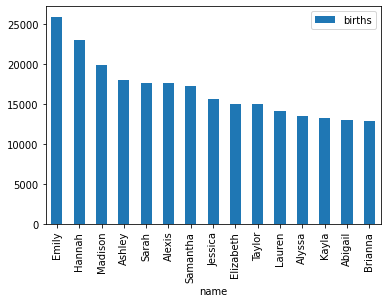

In [73]:
Barp = names2000[0:15]
Barp.plot(x="name", y=["births" , "sex"], kind="bar")


## 3 Aggregation (Service requests data)

The following code loads the service requests data used in one of your pandas notebooks, and creates 
a subtable consisting of the data for just three agencies.  It then adds a **new** column called `Count`,
which we're going to use for counting complaints.  Since each row represents exactly one complain,
the value in the `Count` column is always 1.

You can learn more about this data set in the [pandas pivot and merge notebook.](https://github.com/gawron/python-for-social-science/blob/master/pandas/pandas_pivot_and_merge.ipynb)

In [74]:
import pandas as pd
fn = '311-service-requests.csv'
base_url = 'https://github.com/gawron/pandas-cookbook/master/data'
path = f'{base_url}/{fn}'
raw_path = path.replace('github.com','raw.githubusercontent.com')
complaints = pd.read_csv(raw_path,error_bad_lines=False)
complaints['Count'] = 1

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


Looking at the `Count` column:

In [75]:
complaints['Count'][:10]

0    1
1    1
2    1
3    1
4    1
5    1
6    1
7    1
8    1
9    1
Name: Count, dtype: int64

The following code creates a subtable with just the complaints for the following three
agencies: `DOT`, `DOP`, and `NYPD`.

In [76]:
pt00 = complaints[complaints.Agency.isin(['DOT', "DOP", 'NYPD'])]

Your mission should you decide to accept it is to create pivot table whose rows are the three agencies,
and whose columns are the complaint types.  Each cell in the table thus contains the total number of complaints
of that complaint type for that agency.  For example, in the NYPD row, the Animal Abuse column should
have the number 164, meaning that 164 animal abuse complaints were made to NYPD.


In [77]:
pd.pivot_table(pt00, index = ['Agency'], columns =['Complaint Type'], aggfunc = np.sum)

Count                                   \
Complaint Type Agency Issues Animal Abuse Bike Rack Condition   
Agency                                                          
DOP                      NaN          NaN                 NaN   
DOT                     20.0          NaN                 7.0   
NYPD                     NaN        164.0                 NaN   

                                                                            \
Complaint Type Bike/Roller/Skate Chronic Blocked Driveway Bridge Condition   
Agency                                                                       
DOP                                  NaN              NaN              NaN   
DOT                                  NaN              NaN             20.0   
NYPD                                32.0           4590.0              NaN   

                                                                        \
Complaint Type Broken Muni Meter Bus Stop Shelter Placement Compliment   
Agency                                                                   
DOP                          NaN                        NaN        NaN   
DOT                       2070.0                       14.0        1.0   
NYPD                         NaN                        NaN        NaN   

                                                                       \
Complaint Type Curb Condition DOT Literature Request Derelict Vehicle   
Agency                                                                  
DOP                       NaN                    NaN              NaN   
DOT                      66.0                  123.0              NaN   
NYPD                      NaN                    NaN            803.0   

                                                                        \
Complaint Type Disorderly Youth Drinking Ferry Complaint Ferry Inquiry   
Agency                                                                   
DOP                         NaN      NaN             NaN           NaN   
DOT                         NaN      NaN             4.0          32.0   
NYPD                       26.0     83.0             NaN           NaN   

                                                                               \
Complaint Type Ferry Permit Graffiti Highway Condition Highway Sign - Damaged   
Agency                                                                          
DOP                     NaN      NaN               NaN                    NaN   
DOT                     1.0      NaN             130.0                    1.0   
NYPD                    NaN     13.0               NaN                    NaN   

                                                                      \
Complaint Type Homeless Encampment Illegal Fireworks Illegal Parking   
Agency                                                                 
DOP                            NaN               NaN             NaN   
DOT                            NaN               NaN             NaN   
NYPD                         269.0               3.0          3343.0   

                                                                         \
Complaint Type Invitation Municipal Parking Facility Noise - Commercial   
Agency                                                                    
DOP                   1.0                        NaN                NaN   
DOT                   NaN                        1.0                NaN   
NYPD                  NaN                        NaN             2578.0   

                                                                              \
Complaint Type Noise - House of Worship Noise - Park Noise - Street/Sidewalk   
Agency                                                                         
DOP                                 NaN          NaN                     NaN   
DOT                                 NaN          NaN                     NaN   
NYPD                               67.0        191.0           

## 4.  Baby names

### 4.1: 

Use the babynames data created in the [general pandas intro notebook.](https://github.com/gawron/python-for-social-science/blob/master/pandas/general_pandas_intro.ipynb)
     and matplotlib to plot male and female
    births for the years covered in the data. Put this in
    a `jupyter notebook` file.  In the same notebook, use the babynames data to get a list of male and female names.
    

In [84]:
#from google.colab import files
#uploaded = files.upload()

Saving filename.csv to filename.csv


In [89]:
import urllib.request
import tarfile
import os.path

##. Where the data is on github
base = 'baby_names'
fn = f'{base}.tar.gz'
# The usual URL you visit with your browser
url = f'https://github.com/gawron/python-for-social-science/blob/master/pandas/{fn}'
# The download URL for downloading raw data.
thetarfile = url.replace('github','raw.githubusercontent')
thetarfile = thetarfile.replace('blob/','')

In [90]:
# Prepare a home for extracted data files on your Gdrive
# Change this if you want to run this as a jupyter NB
# and store the data on your local disk drive.
working_dir = '/content/gdrive/My Drive/'
data_dir = os.path.join(working_dir,'data')
try:
  # create directory if necessary
  os.makedirs(data_dir)
except:
  pass
os.chdir(data_dir)

#  When we extract we will extract into data_dir
# This may take a few minutes!
with urllib.request.urlopen(thetarfile) as tarhandle:
  # creates a TarFile inst, note weird mode for unzipping on remote stream
  thetarstream = tarfile.open(fileobj=tarhandle, mode="r|gz")
  # Extract all files into current directory
  thetarstream.extractall()

In [93]:
import pandas as pd
years = list(range(1880,2011))
pieces = []
columns = ['name','sex','births']
    
for year in years:
    path = f'names/yob{year:d}.txt'
    frame = pd.read_csv(path,names=columns)
    frame['year'] = year
    pieces.append(frame)    
    
Names_Data = pd.concat(pieces, ignore_index=True)

In [95]:
Names_Data.head()

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880


In [103]:
Male_data = Names_Data[(Names_Data['sex'] == 'M')]["name"]
Female_data = Names_Data[(Names_Data['sex'] == 'F')]["name"]


print("List of male names:\n ",Male_data, "\n List of Female Names:\n ", Female_data)

List of male names:
  942             John
943          William
944            James
945          Charles
946           George
             ...    
1690779      Zymaire
1690780       Zyonne
1690781    Zyquarius
1690782        Zyran
1690783        Zzyzx
Name: name, Length: 686799, dtype: object 
 List of Female Names:
  0               Mary
1               Anna
2               Emma
3          Elizabeth
4             Minnie
             ...    
1676639       Zylynn
1676640       Zyniya
1676641      Zyonnah
1676642      Zyriana
1676643    Zyrihanna
Name: name, Length: 1003985, dtype: object


<Figure size 2160x1440 with 0 Axes>

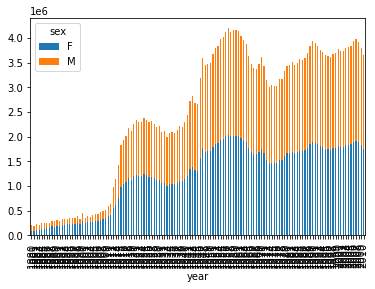

In [96]:
import numpy
import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize=[30, 20])
Birth_Gr = pd.crosstab(index=Names_Data['year'], columns=Names_Data['sex'],
                   values=Names_Data['births'], aggfunc='sum')
Birth_Gr.plot.bar(stacked=True)

### 4.2

Aggregate the data for all years from the website
    (see the examples in the 
    Pandas notebook [general_pandas_intro.](https://github.com/gawron/python-for-social-science/blob/master/pandas/general_pandas_intro.ipynb)
    Find the **set** of all male names and the **set**
    of all female names. 
    For each letter find its frequency as a last letter in
    male names and in female names, using 
    Python Counters (`from collections import Counter`).
    Use matplotlib to draw a single plot that  shows
    contrast between the last-letter frequencies 
    for male and female names; x-axis is letters;
    y-axis is frequencies.

    

In [97]:
from collections import Counter


Male_data = Names_Data[(Names_Data['sex'] == 'M')]["name"]
Male_Last = [Letter[-1:] for Letter in Male_data]
Male_Freq = Counter(Male_Last)

Female_data = Names_Data[(Names_Data['sex'] == 'F')]["name"]
Female_Last = [Letter[-1:] for Letter in Female_data]
Female_Freq = Counter(Female_Last)
#Female_Freq

Female_Freq

Counter({'a': 423070,
         'b': 441,
         'c': 760,
         'd': 6472,
         'e': 226579,
         'f': 125,
         'g': 1736,
         'h': 38391,
         'i': 44045,
         'j': 157,
         'k': 1549,
         'l': 35858,
         'm': 3612,
         'n': 101212,
         'o': 8319,
         'p': 355,
         'q': 24,
         'r': 14073,
         's': 19423,
         't': 10540,
         'u': 2021,
         'v': 107,
         'w': 640,
         'x': 843,
         'y': 61789,
         'z': 1844})

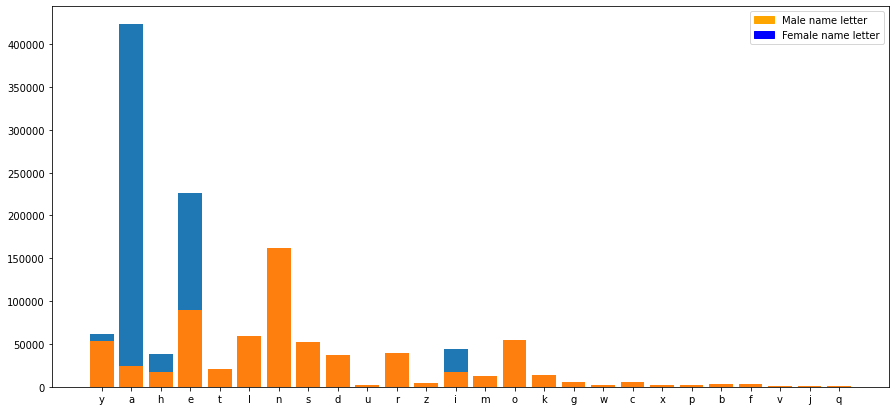

In [98]:

import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
plt.figure(figsize=[15, 7])

plt.bar(*zip(*Female_Freq.items()))
plt.bar(*zip(*Male_Freq.items()))


Male = mpatches.Patch(color='orange', label='Male name letter')
Female= mpatches.Patch(color='blue', label='Female name letter')
plt.legend(handles=[Male, Female])



### 4.3

Another plot.  The x-axis is names;
    the y-axis is frequencies.  Aggregate the data for female names into
    decades (10 year increments).  Produce a plot
    that contains an 1880s line, a 1940s line, and 
    a 1990s line.  There is a display issue here.  There
    are too many names to just write them out on the
    x-axis.  Try to devise an informative way of displaying
    the data that tells a story about fashions in names change.   Hint: Pick a value for n and consider the n most popular names in a decade.  But which decade?

In [104]:
#Names_Data.agg(["year"])
Female_data = Names_Data[(Names_Data['sex'] == 'F')]
Female_data[["year","name"]].groupby(['year','name']).count()


Empty DataFrame
Columns: []
Index: [(1880, Abbie), (1880, Abby), (1880, Abigail), (1880, Ada), (1880, Adah), (1880, Adaline), (1880, Adda), (1880, Addie), (1880, Adela), (1880, Adelaide), (1880, Adele), (1880, Adelia), (1880, Adeline), (1880, Adella), (1880, Adelle), (1880, Adina), (1880, Adline), (1880, Adrienne), (1880, Agatha), (1880, Agnes), (1880, Aileen), (1880, Aimee), (1880, Alba), (1880, Alberta), (1880, Albertina), (1880, Albertine), (1880, Albina), (1880, Alda), (1880, Alice), (1880, Alida), (1880, Aline), (1880, Alla), (1880, Allie), (1880, Alma), (1880, Almeda), (1880, Almira), (1880, Alpha), (1880, Alta), (1880, Altha), (1880, Althea), (1880, Alva), (1880, Alvena), (1880, Alverta), (1880, Alvina), (1880, Alyce), (1880, Alys), (1880, Amalia), (1880, Amanda), (1880, Amber), (1880, Amelia), (1880, America), (1880, Amie), (1880, Amy), (1880, Ana), (1880, Anastasia), (1880, Angela), (1880, Angelina), (1880, Angeline), (1880, Angie), (1880, Anita), (1880, Ann), (1880, Anna), (1880, Annabel), (1880, Annabelle), (1880, Anne), (1880, Anner), (1880, Annetta), (1880, Annette), (1880, Annie), (1880, Annis), (1880, Antoinette), (1880, Antonia), (1880, Ara), (1880, Araminta), (1880, Ardelia), (1880, Ardella), (1880, Arie), (1880, Arizona), (1880, Arminta), (1880, Arrie), (1880, Arthur), (1880, Artie), (1880, Arvilla), (1880, Augusta), (1880, Augustine), (1880, Aurelia), (1880, Aurora), (1880, Ava), (1880, Avis), (1880, Bama), (1880, Barbara), (1880, Beatrice), (1880, Becky), (1880, Bell), (1880, Bella), (1880, Belle), (1880, Bena), (1880, Bennie), (1880, Bernadette), (1880, Bernice), ...]

[1003985 rows x 0 columns]

In [100]:
df = Names_Data.groupby(['year', 'name'])['name'].count()
df

year  name     
1880  Aaron        1
      Ab           1
      Abbie        1
      Abbott       1
      Abby         1
                  ..
2010  Zyron        1
      Zyshawn      1
      Zytavious    1
      Zyyanna      1
      Zzyzx        1
Name: name, Length: 1540017, dtype: int64

In [105]:
Names_Data.pivot_table('sex','name', 
                                 columns='year', aggfunc=sum)

year,1880,1881,1882,1883,1884,1885,1886,1887,1888,1889,1890,1891,1892,1893,1894,1895,1896,1897,1898,1899,1900,1901,1902,1903,1904,1905,1906,1907,1908,1909,...,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Aaban,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,M,NaN,M,M
Aabid,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Aabriella,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,F,NaN,NaN
Aadam,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,M,M,NaN,NaN,NaN,NaN,M,M,M,M,M,M,M,M,NaN,M,M,M,M,M,M,M,M,M
Aadan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,M,NaN,NaN,NaN,M,M,M,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zyshonne,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,M,M,M,M,M,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Zytavious,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,M,NaN,M,M,M,M,NaN,M,M
Zyvion,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,M,NaN


### 4.4 Extra Credit (You can wait until you learn about machine learning to do this)

Train a classifier that distinguishes male names
    from female names.  The features should be the last three
    letters in the names and the first three letters. If a name
    has fewer than six letters, it is okay for a letter to be represented
    both as a first letter and as a last letter.
    (This strategy guarantees that all names have the same length
    representation).  You will have to make a decision about what to do about
    ambiguous names (Lee, Sam, Pat), but don't simply exclude them.
    Note:  There are different interesting ways to deal with this issue, not
    just one answer. You should ask if you are unsure about your
    solution.
    
If a name has fewer than three letters ('Al'), pad it with spaces
    and use the spaces as part of your representation ('Al' => 'Al ') and the first
    three letters are ['A', 'l', ' '] and the last three letters are
    ['A', 'l', ' '].  Separate your names into training and test
    names.  Extra credit.  Does it help to make the decade a feature?
    
Turn  in your  notebook file, showing the code you used to
    complete parts 